In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

In [ ]:
def matyas_function(x):
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]

def himmelblau_function(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def himmelblau_gradient(x):
    df_dx0 = 2 * (x[0]**2 + x[1] - 11) * (2 * x[0]) + 2 * (x[0] + x[1]**2 - 7)
    df_dx1 = 2 * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7) * (2 * x[1])
    return np.array([df_dx0, df_dx1])

def matyas_gradient(x):
    df_dx0 = 0.52 * x[0] - 0.48 * x[1]
    df_dx1 = 0.52 * x[1] - 0.48 * x[0]
    return np.array([df_dx0, df_dx1])

In [ ]:
x, y = sp.symbols('x y')
himmelblau_function_symb = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
himmelblau_gradient_symb = [sp.diff(himmelblau_function_symb, var) for var in (x, y)]
print("\nГрадиент функции Химмельблау:")
print(himmelblau_gradient_symb)
x, y = sp.symbols('x y')
matyas_function_symb = 0.26 * (x**2 + y**2) - 0.48 * x * y
matyas_gradient_symb = [sp.diff(matyas_function_symb, var) for var in (x, y)]
print("\nГрадиент функции Матьяса:")
print(matyas_gradient_symb)


Градиент функции Химмельблау:
[4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14, 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22]

Градиент функции Матьяса:
[0.52*x - 0.48*y, -0.48*x + 0.52*y]


In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z_matyas = matyas_function(np.array([x, y]))
z_himmelblau = himmelblau_function(np.array([x, y]))

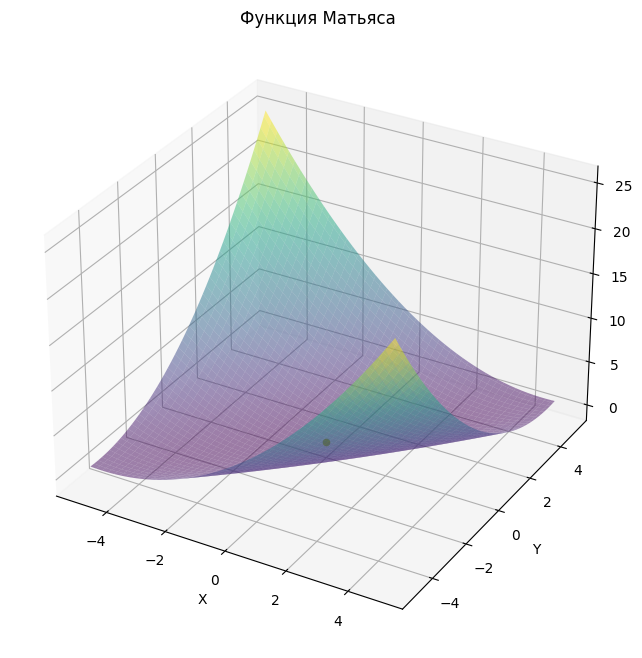

In [ ]:
fig_matyas = plt.figure(figsize=(10, 8))
ax_matyas = fig_matyas.add_subplot(111, projection='3d')
ax_matyas.plot_surface(x, y, z_matyas, cmap='viridis', alpha=0.5)
ax_matyas.set_title('Функция Матьяса')
ax_matyas.set_xlabel('X')
ax_matyas.set_ylabel('Y')
ax_matyas.set_zlabel('Z')

true_optimum_matyas = np.array([[0.0, 0.0]])

for opt in true_optimum_matyas:
  ax_matyas.scatter(opt[0], opt[1], matyas_function(opt), color='y',  alpha=1.0)

plt.show()

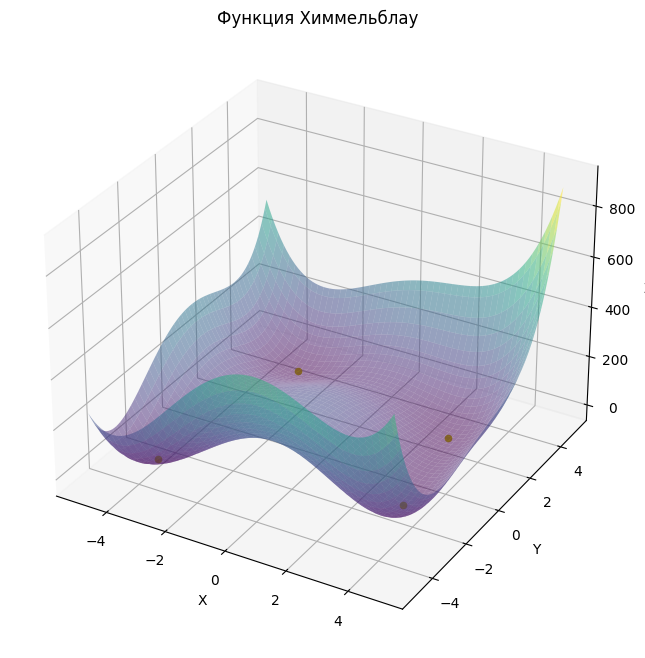

In [ ]:
fig_himmelblau = plt.figure(figsize=(10, 8))
ax_himmelblau = fig_himmelblau.add_subplot(111, projection='3d')
ax_himmelblau.plot_surface(x, y, z_himmelblau, cmap='viridis', alpha=0.5)
ax_himmelblau.set_title("Функция Химмельблау")
ax_himmelblau.set_xlabel('X')
ax_himmelblau.set_ylabel('Y')
ax_himmelblau.set_zlabel('Z')

true_optimum_himmelblau = np.array([[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]])
for opt in true_optimum_himmelblau:
    ax_himmelblau.scatter(opt[0], opt[1], himmelblau_function(opt), color='y',  alpha=1.0)

plt.show()

In [ ]:
def gradient_descent(initial_params, learning_rate, num_iterations, gradient_func, func, true_optimum):
    params = initial_params.copy()
    params_history = [params.copy()]
    cost_history = []

    for _ in range(num_iterations):
        gradient = gradient_func(params)
        params = params - learning_rate * gradient

        cost = func(params)
        cost_history.append(cost)
        params_history.append(params.copy())

    # Вычисление погрешности в сравнении с аналитическим оптимумом
    final_optimum = params_history[-1]
    error = np.linalg.norm(final_optimum - true_optimum)

    return np.array(params_history), np.array(cost_history), error

In [ ]:
initial_params = np.array([2.0, 0.0])
learning_rate = 0.1
num_iterations = 200

# Запуск градиентного спуска
params_history, cost_history, error_matyas = gradient_descent(initial_params, learning_rate, num_iterations, matyas_gradient, matyas_function, true_optimum_matyas)

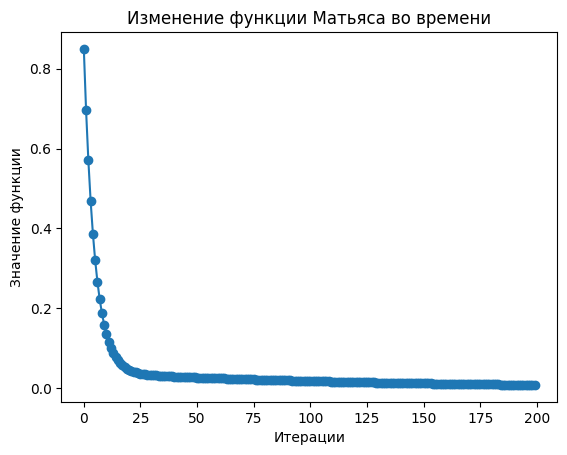

In [ ]:
# График изменения функции Матьяса со временем
plt.plot(range(num_iterations), cost_history, marker='o')
plt.title('Изменение функции Матьяса во времени')
plt.xlabel('Итерации')
plt.ylabel('Значение функции')
plt.show()

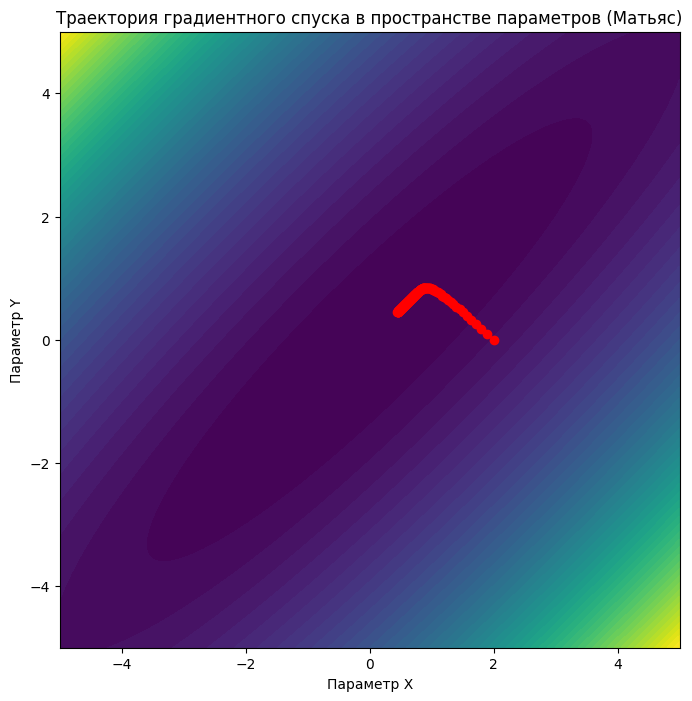

In [ ]:
# График траектории градиентного спуска в пространстве параметров
plt.figure(figsize=(8, 8))
plt.contourf(x, y, z_matyas, levels=50, cmap='viridis')
plt.plot(params_history[:, 0], params_history[:, 1], marker='o', color='red')

plt.title('Траектория градиентного спуска в пространстве параметров (Матьяс)')
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [ ]:
initial_params = np.array([2.0, 2.0])
learning_rate = 0.01
num_iterations = 1000

# Запуск градиентного спуска
params_history_himmelblau, cost_history, error_himmelblau = gradient_descent(initial_params, learning_rate, num_iterations, himmelblau_gradient, himmelblau_function, true_optimum_himmelblau[0])

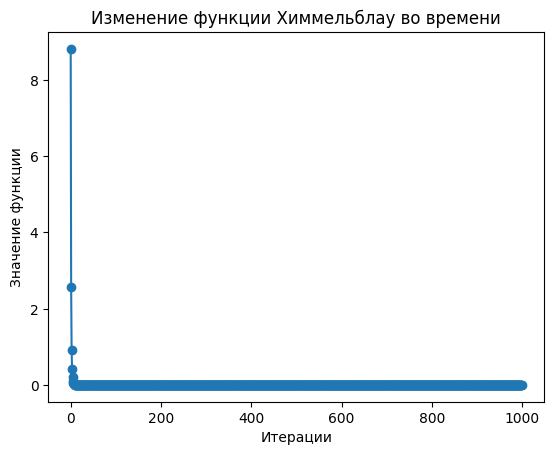

In [ ]:
plt.plot(range(num_iterations), cost_history, marker='o')
plt.title('Изменение функции Химмельблау во времени')
plt.xlabel('Итерации')
plt.ylabel('Значение функции')
plt.show()

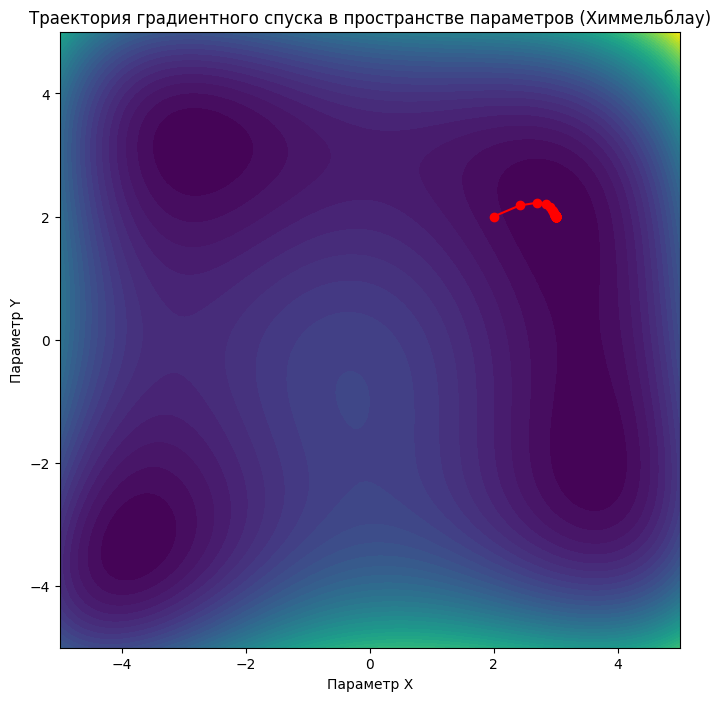

In [ ]:
plt.figure(figsize=(8, 8))
plt.contourf(x, y, z_himmelblau, levels=50, cmap='viridis')
plt.plot(params_history_himmelblau[:, 0], params_history_himmelblau[:, 1], marker='o', color='red')
plt.title('Траектория градиентного спуска в пространстве параметров (Химмельблау)')
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [ ]:
print("Погрешность для функции Матьяса:", error_matyas)

Погрешность для функции Матьяса: 0.6344284975287848


In [ ]:
print("Погрешность для функции Химмельблау:", error_himmelblau)

Погрешность для функции Химмельблау: 6.280369834735101e-16


In [ ]:
def gradient_descent_with_moment(initial_params, learning_rate, num_iterations, gradient_func, func, true_optimum, gamma=0.9):
    params = initial_params.copy()
    params_history = [params.copy()]
    cost_history = []

    u = 0
    for _ in range(num_iterations):
        u = gamma * u + learning_rate * gradient_func(params)
        params = params - u
        cost = func(params)
        cost_history.append(cost)
        params_history.append(params.copy())

    # Вычисление погрешности в сравнении с аналитическим оптимумом
    final_optimum = params_history[-1]
    error = np.linalg.norm(final_optimum - true_optimum)

    return np.array(params_history), np.array(cost_history), error

In [ ]:
initial_params = np.array([2.0, 0.0])
learning_rate = 0.1
num_iterations = 200
params_history, cost_history, error_matyas = gradient_descent_with_moment(initial_params, learning_rate, num_iterations, matyas_gradient, matyas_function, true_optimum_matyas)
print("Погрешность для функции Матьяса:", error_matyas)

Погрешность для функции Матьяса: 5.815448034472797e-05


In [ ]:
initial_params = np.array([2.0, 2.0])
learning_rate = 0.01
num_iterations = 1000
params_history_himmelblau, cost_history, error_himmelblau = gradient_descent_with_moment(initial_params, learning_rate, num_iterations, himmelblau_gradient, himmelblau_function, true_optimum_himmelblau[0])
print("Погрешность для функции Химмельблау:", error_himmelblau)

Погрешность для функции Химмельблау: 0.0


In [ ]:
def gradient_descent_with_adaptation(initial_params, learning_rate, num_iterations, gradient_func, func, true_optimum, b1=0.6, b2=0.999):
    params = initial_params.copy()
    params_history = [params.copy()]
    cost_history = []

    m = np.array([0, 0])
    v = np.array([0, 0])

    for _ in range(num_iterations):

        gradient = gradient_func(params)
        m = b1 * m + (1 - b1) * gradient
        v = b2 * v + (1 - b2) * gradient ** 2

        params = params - learning_rate * gradient

        cost = func(params)
        cost_history.append(cost)
        params_history.append(params.copy())

    # Вычисление погрешности в сравнении с аналитическим оптимумом
    final_optimum = params_history[-1]
    error = np.linalg.norm(final_optimum - true_optimum)

    return np.array(params_history), np.array(cost_history), error

In [ ]:
initial_params = np.array([2.0, 0.0])
learning_rate = 0.1
num_iterations = 200
params_history, cost_history, error_matyas = gradient_descent_with_adaptation(initial_params, learning_rate, num_iterations, matyas_gradient, matyas_function, true_optimum_matyas)
print("Погрешность для функции Матьяса:", error_matyas)

Погрешность для функции Матьяса: 0.6344284975287848


In [ ]:
initial_params = np.array([2.0, 2.0])
learning_rate = 0.01
num_iterations = 1000
params_history_himmelblau, cost_history, error_himmelblau = gradient_descent_with_adaptation(initial_params, learning_rate, num_iterations, himmelblau_gradient, himmelblau_function, true_optimum_himmelblau[0])
print("Погрешность для функции Химмельблау:", error_himmelblau)

Погрешность для функции Химмельблау: 6.280369834735101e-16


In [ ]:
def gradient_descent_with_moment_and_lr_shaduler(initial_params, learning_rate, num_iterations, gradient_func, func, true_optimum, gamma=0.9):
    params = initial_params.copy()
    params_history = [params.copy()]
    cost_history = []

    u = 0
    for _ in range(num_iterations):
        u = gamma * u + learning_rate * gradient_func(params)
        params = params - u
        cost = func(params)
        cost_history.append(cost)
        params_history.append(params.copy())

        # Адаптация темпа обучения на основе результатов предыдущих итераций
        if len(cost_history) > 1 and cost_history[-1] > cost_history[-2]:
            learning_rate *= 0.7  # Уменьшение темпа обучения в случае ухудшения

    # Вычисление погрешности в сравнении с аналитическим оптимумом
    final_optimum = params_history[-1]
    error = np.linalg.norm(final_optimum - true_optimum)

    return np.array(params_history), np.array(cost_history), error

In [ ]:
initial_params = np.array([2.0, 0.0])
learning_rate = 0.1
num_iterations = 400
params_history, cost_history, error_matyas = gradient_descent_with_moment_and_lr_shaduler(initial_params, learning_rate, num_iterations, matyas_gradient, matyas_function, true_optimum_matyas)
print("Погрешность для функции Матьяса:", error_matyas)

Погрешность для функции Матьяса: 1.7659486956872186


In [ ]:
linitial_params = np.array([2.0, 2.0])
learning_rate = 0.01
num_iterations = 2000
params_history_himmelblau, cost_history, error_himmelblau = gradient_descent_with_moment_and_lr_shaduler(initial_params, learning_rate, num_iterations, himmelblau_gradient, himmelblau_function, true_optimum_himmelblau[0])
print("Погрешность для функции Химмельблау:", error_himmelblau)

Погрешность для функции Химмельблау: 0.7661092442505179
